<a href="https://colab.research.google.com/github/Bormey-Sky/Heat_Disease_Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data = pd.read_csv('/content/gdrive/My Drive/dataset/framingham_heart_disease.csv')

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape

(4238, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

Find empty column and replace the value with mean value 

In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Find mean value

In [ ]:
mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [ ]:
print(mean_cigsPerDay)
print(mean_BPmeds)
print(mean_totChol)
print(mean_BMI)
print(mean_glucose)
print(mean_heartRate)

9
0
237
26
82
76


Fill empty column with mean value

In [ ]:
data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)

In [ ]:
data.rename(columns={'male':'Sex'}, inplace = True)
# where male = 1, female = 0
data.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data[:].describe()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003067,0.029259,0.005899,0.310524,0.025720,236.724870,132.352407,82.893464,25.802895,75.878952,81.969797,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326463,22.038097,11.910850,4.070974,12.025177,22.836605,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Dropped 'education' column because in this case it is not very relevant 

In [ ]:
dataset = data.drop(['education'], axis = 1, inplace=True)

In [ ]:
data.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape

(4238, 15)

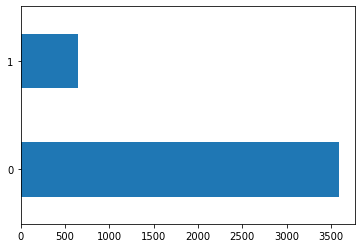

In [ ]:
data.TenYearCHD.value_counts().plot.barh()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

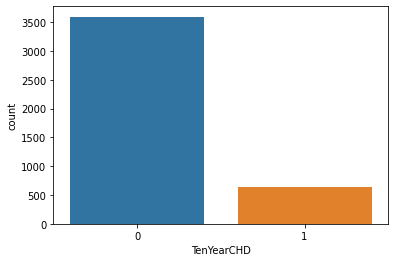

In [ ]:
sns.countplot(data['TenYearCHD'])

In [ ]:
data.groupby('TenYearCHD').mean()
# use to create new data to test 

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.712577,0.023094,0.003895,0.275737,0.019199,235.193378,130.333612,82.160963,25.673826,75.762382,80.806066
1,0.532609,54.145963,0.517081,10.624224,0.063665,0.017081,0.504658,0.062112,245.271739,143.618789,86.981366,26.523199,76.529503,88.464286


**Some Key Takeaways**

* Most of the Male has 10-year risk of developing coronary heart disease.

* Most of the people having mean of age group 54.25 have high risk for developing coronary heart disease
* Current Smoker have high high risk for developing coronary heart disease than non smokers
* CigsPerDay, BPMeds, prevalentStroke, prevalentHyp are directly proportional with developing the risk for CHR





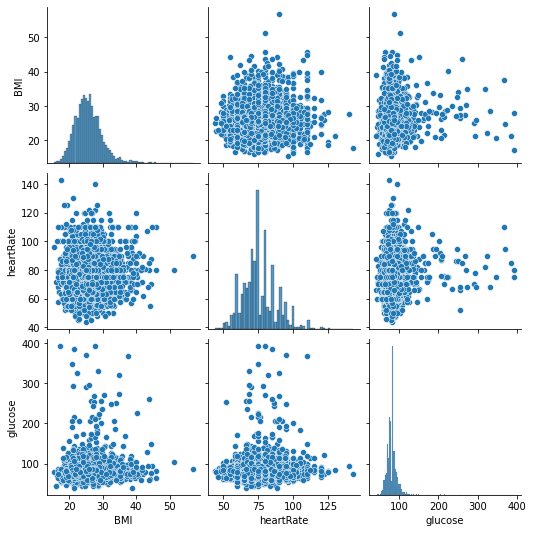

In [ ]:
sns.pairplot(data[["BMI","heartRate","glucose"]])

Renaming Columns of the dataset (Optional)

In [ ]:
data.rename(columns={'age':'Age'}, inplace = True)
data.rename(columns={'cigsPerDay':'CigsPerDay'}, inplace = True)
data.rename(columns={'totChol':'TotChol'}, inplace = True)
data.rename(columns={'sysBP':'SysBP'}, inplace = True)
data.rename(columns={'diaBP':'DiaBP'}, inplace = True)
data.rename(columns={'heartRate':'HeartRate'}, inplace = True)
data.rename(columns={'glucose':'Glucose'}, inplace = True)
data.rename(columns={'currentSmoker':'CurrentSmoker'}, inplace = True)
data.rename(columns={'prevalentStroke':'PrevalentStroke'}, inplace = True)
data.rename(columns={'prevalentHyp':'PrevalentHyp'}, inplace = True)
data.rename(columns={'diabetes':'Diabetes'}, inplace = True)
data.rename(columns={'TenYearCHD':'ChronicHeartDisease'}, inplace = True)

In [ ]:
data.head()

,Sex,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,ChronicHeartDisease
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Data Normalisation

In [ ]:
cols_to_be_normalized = ["Age","CigsPerDay","TotChol","SysBP","DiaBP","BMI","HeartRate","Glucose"]
cols_not_to_be_normalized = ["Sex","CurrentSmoker","BPMeds","PrevalentStroke","PrevalentHyp","Diabetes","ChronicHeartDisease"]

normalized = normalize(data[cols_to_be_normalized])
boolean = data[cols_not_to_be_normalized]


In [ ]:
data_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
data_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)

In [ ]:
data_normalized.head()

,Age,CigsPerDay,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose
0,0.148753,0.000000,0.743764,0.404302,0.266992,0.102868,0.305134,0.293691
1,0.144425,0.000000,0.784921,0.379902,0.254314,0.090203,0.298270,0.238616
2,0.154476,0.064365,0.788469,0.410326,0.257459,0.081550,0.241368,0.225277
3,0.190605,0.093740,0.703050,0.468700,0.296843,0.089303,0.203103,0.321841
4,0.131263,0.065631,0.813259,0.370960,0.239697,0.065917,0.242551,0.242551


In [ ]:
data_boolean.head()

,Sex,CurrentSmoker,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,ChronicHeartDisease
0,1,0,0.0,0,0,0,0
1,0,0,0.0,0,0,0,0
2,1,1,0.0,0,0,0,0
3,0,1,0.0,0,1,0,1
4,0,1,0.0,0,0,0,0


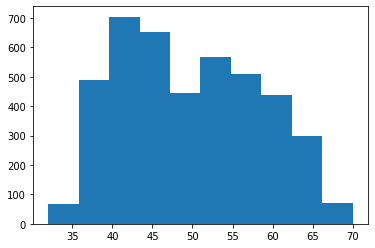

In [ ]:
Age=data["Age"]
plt.hist(Age.dropna(), label="Age")
plt.show()

In [ ]:
data_final = data_normalized.merge(data_boolean,left_index=True, right_index=True)

In [ ]:
data_final.head()

,Age,CigsPerDay,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,Sex,CurrentSmoker,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,ChronicHeartDisease
0,0.148753,0.000000,0.743764,0.404302,0.266992,0.102868,0.305134,0.293691,1,0,0.0,0,0,0,0
1,0.144425,0.000000,0.784921,0.379902,0.254314,0.090203,0.298270,0.238616,0,0,0.0,0,0,0,0
2,0.154476,0.064365,0.788469,0.410326,0.257459,0.081550,0.241368,0.225277,1,1,0.0,0,0,0,0
3,0.190605,0.093740,0.703050,0.468700,0.296843,0.089303,0.203103,0.321841,0,1,0.0,0,1,0,1
4,0.131263,0.065631,0.813259,0.370960,0.239697,0.065917,0.242551,0.242551,0,1,0.0,0,0,0,0


In [ ]:
data_final.ChronicHeartDisease.value_counts()

0    3594
1     644
Name: ChronicHeartDisease, dtype: int64

Split test and training data

In [ ]:
X = data_final.drop('ChronicHeartDisease',axis = 1)
Y = data_final['ChronicHeartDisease'] 
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1 , test_size = 2)

Model Training
Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Prediction with trained model

In [ ]:
Y_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_prediction)
print('Accuracy: ', training_data_accuracy)

Accuracy:  0.8496222851746931


Building a predictive system

In [ ]:
input_data = (0,43,0,0,0,0,1,0,228,180,110,30.3,77,99)

# change input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape numpy array as we were only predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

[1]


Model Training Decision Tree

In [ ]:
model2 = tree.DecisionTreeClassifier()
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[12] <= 0.5\nentropy = 0.615\nsamples = 4236\nvalue = [3592, 644]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\nentropy = 0.498\nsamples = 2920\nvalue = [2601, 319]'),
 Text(0.125, 0.375, 'x[0] <= 0.152\nentropy = 0.401\nsamples = 1672\nvalue = [1539, 133]'),
 Text(0.0625, 0.125, 'entropy = 0.277\nsamples = 712\nvalue = [678, 34]'),
 Text(0.1875, 0.125, 'entropy = 0.479\nsamples = 960\nvalue = [861, 99]'),
 Text(0.375, 0.375, 'x[5] <= 0.077\nentropy = 0.607\nsamples = 1248\nvalue = [1062, 186]'),
 Text(0.3125, 0.125, 'entropy = 0.76\nsamples = 309\nvalue = [241, 68]'),
 Text(0.4375, 0.125, 'entropy = 0.545\nsamples = 939\nvalue = [821, 118]'),
 Text(0.75, 0.625, 'x[0] <= 0.188\nentropy = 0.806\nsamples = 1316\nvalue = [991, 325]'),
 Text(0.625, 0.375, 'x[7] <= 0.368\nentropy = 0.765\nsamples = 1100\nvalue = [855, 245]'),
 Text(0.5625, 0.125, 'entropy = 0.742\nsamples = 1060\nvalue = [837, 223]'),
 Text(0.6875, 0.125, 'entropy = 0.993\nsamples = 40\nvalue = [18, 22]'),
 Text(0

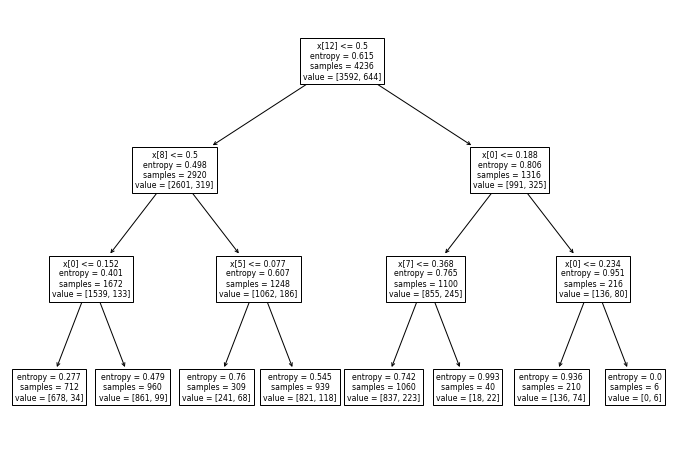

In [ ]:
X_train_prediction2 = model2.predict(X_train)
X_train_prediction2
plt.figure(figsize=(12,8))
tree.plot_tree(model2.fit(X_train, Y_train))

In [ ]:
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy: ', training_data_accuracy2)

Accuracy:  0.8503305004721435


In [ ]:
input_data = (1,43,1,43,0,0,0,0,226,115,85.5,27.57,75,75)

# change input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape numpy array as we were only predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)

print(prediction)

[1]
